Question 2. For the plane frame shown in figure 2, determine the following. Obtain results
at E = 200 GPa, A= 4 x 10-2 m2, I = 1 x 10-6 m4, w = 8 kN/m, L1=2 m, L2=4 m, L3=3 m.
1. Global stiffness matrix for the structure.
2. Displacements and rotation at node 2.
3. Reactions at nodes 1 and 3.
4. Axial force, shear force, and bending moment in each element.
5. Axial force, shear force, and bending moment diagrams for each element.

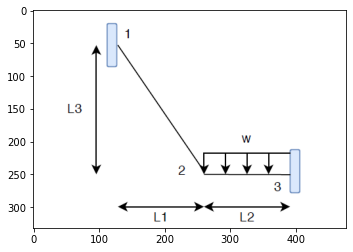

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Q2.png')
imgplot = plt.imshow(img)

In [2]:

#E=200e6     #A=4e-2     #I=1e-6
#w=8         #L_1=2      #L2=4
#L_3=3
E=float(input("Enter Young's Modulus in KN/m^2"))
A=float(input("Enter Area in m^2"))
I=float(input("Enter Moment of inertia in m^4"))
w=float(input("Enter value of UDL in KN/m"))
L_1=float(input("Enter Length L1 in m"))
L2=float(input("Enter Length L2 in m"))
L_3=float(input("Enter Length L3 in m"))
L1=np.sqrt(L_1**2+L_3**2)
theta1=360-np.arctan(L_3/L_1)*180/np.pi
theta2=0

In [3]:
def PlaneFrameElementStiffness(E,A,I,L,theta):
    x = theta*np.pi/180
    C = np.cos(x)
    S = np.sin(x)
    w1 = A*C*C + 12*I*S*S/(L*L)
    w2 = A*S*S + 12*I*C*C/(L*L)
    w3 = (A-12*I/(L*L))*C*S
    w4 = 6*I*S/L
    w5 = 6*I*C/L
    return E/L*np.array([[w1, w3, -w4, -w1, -w3, -w4],
                    [w3, w2, w5, -w3, -w2, w5],
                    [-w4, w5, 4*I, w4, -w5, 2*I], 
                    [-w1, -w3, w4, w1, w3, w4],
                    [-w3, -w2, -w5, w3, w2, -w5], 
                    [-w4, w5, 2*I, w4, -w5, 4*I]])

k1=PlaneFrameElementStiffness(E,A,I,L1,theta1)
k2=PlaneFrameElementStiffness(E,A,I,L2,theta2)

In [4]:
def PlaneFrameAssemble(K,k,i,j):
    K[3*i-3,3*i-3] += k[0,0]
    K[3*i-3,3*i-2] += k[0,1]
    K[3*i-3,3*i-1] += k[0,2]
    K[3*i-3,3*j-3] += k[0,3]
    K[3*i-3,3*j-2] += k[0,4]
    K[3*i-3,3*j-1] += k[0,5]
    K[3*i-2,3*i-3] += k[1,0]
    K[3*i-2,3*i-2] += k[1,1]
    K[3*i-2,3*i-1] += k[1,2]
    K[3*i-2,3*j-3] += k[1,3]
    K[3*i-2,3*j-2] += k[1,4]
    K[3*i-2,3*j-1] += k[1,5]
    K[3*i-1,3*i-3] += k[2,0]
    K[3*i-1,3*i-2] += k[2,1]
    K[3*i-1,3*i-1] += k[2,2]
    K[3*i-1,3*j-3] += k[2,3]
    K[3*i-1,3*j-2] += k[2,4]
    K[3*i-1,3*j-1] += k[2,5]
    K[3*j-3,3*i-3] += k[3,0]
    K[3*j-3,3*i-2] += k[3,1]
    K[3*j-3,3*i-1] += k[3,2]
    K[3*j-3,3*j-3] += k[3,3]
    K[3*j-3,3*j-2] += k[3,4]
    K[3*j-3,3*j-1] += k[3,5]
    K[3*j-2,3*i-3] += k[4,0]
    K[3*j-2,3*i-2] += k[4,1]
    K[3*j-2,3*i-1] += k[4,2]
    K[3*j-2,3*j-3] += k[4,3]
    K[3*j-2,3*j-2] += k[4,4]
    K[3*j-2,3*j-1] += k[4,5]
    K[3*j-1,3*i-3] += k[5,0]
    K[3*j-1,3*i-2] += k[5,1]
    K[3*j-1,3*i-1] += k[5,2]
    K[3*j-1,3*j-3] += k[5,3]
    K[3*j-1,3*j-2] += k[5,4]
    K[3*j-1,3*j-1] += k[5,5]
    return K

K=np.zeros((9,9))
K=PlaneFrameAssemble(K,k1,1,2)
K=PlaneFrameAssemble(K,k2,2,3)
print(f"Global Stiffness Matrix :\n{K}")

Global Stiffness Matrix :
[[ 6.82743382e+05 -1.02403827e+06  7.68046426e+01 -6.82743382e+05
   1.02403827e+06  7.68046426e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.02403827e+06  1.53610861e+06  5.12030950e+01  1.02403827e+06
  -1.53610861e+06  5.12030950e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 7.68046426e+01  5.12030950e+01  2.21880078e+02 -7.68046426e+01
  -5.12030950e+01  1.10940039e+02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-6.82743382e+05  1.02403827e+06 -7.68046426e+01  2.68274338e+06
  -1.02403827e+06 -7.68046426e+01 -2.00000000e+06  0.00000000e+00
   0.00000000e+00]
 [ 1.02403827e+06 -1.53610861e+06 -5.12030950e+01 -1.02403827e+06
   1.53614611e+06  2.37969050e+01  0.00000000e+00 -3.75000000e+01
   7.50000000e+01]
 [ 7.68046426e+01  5.12030950e+01  1.10940039e+02 -7.68046426e+01
   2.37969050e+01  4.21880078e+02  0.00000000e+00 -7.50000000e+01
   1.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.00000000e+06
  

In [5]:
k=K[3:6,3:6]
f=[[0],[-w*L2/2],[-w*(L2**2)/12]]
u=np.linalg.inv(k).dot(f)
print(f"Horizontal displacement at node 2 :{u[0]} meter")
print(f"vertical displacement at node 2 :{u[1]} meter")
print(f"Rotation at node 2 :{u[2]} rad")

Horizontal displacement at node 2 :[-6.10316323e-06] meter
vertical displacement at node 2 :[-1.40925349e-05] meter
Rotation at node 2 :[-0.02528396] rad


In [6]:
U=np.zeros((9,1))
U[3:6]=u[0:3]
F=K.dot(U)
print(f"Horizontal Reaction at node 1 : {F[0]} KN")
print(f"Vertical Reaction at node 1 : {F[1]} KN")
print(f"Moment at node 1 : {F[2]} KN-m")
print(f"Horizontal Reaction at node 3 : {F[6]} KN")
print(f"Vertical Reaction at node 3 : {F[7]} KN")
print(f"Moment at node 3 : {F[8]} KN-m")

Horizontal Reaction at node 1 : [-12.20632646] KN
Vertical Reaction at node 1 : [14.10317435] KN
Moment at node 1 : [-2.80381345] KN-m
Horizontal Reaction at node 3 : [12.20632646] KN
Vertical Reaction at node 3 : [1.89682565] KN
Moment at node 3 : [-2.52945318] KN-m


In [7]:
def PlaneFrameElementForces(E,A,I,L,theta,u):
    x = theta * np.pi/180
    C = np.cos(x)
    S = np.sin(x)
    w1 = E*A/L
    w2 = 12*E*I/(L*L*L)
    w3 = 6*E*I/(L*L)
    w4 = 4*E*I/L
    w5 = 2*E*I/L
    kprime = np.array([[w1, 0, 0, -w1, 0, 0],[0, w2, w3, 0, -w2, w3],[0, w3, w4, 0, -w3, w5],
                     [-w1, 0, 0, w1, 0, 0],[0, -w2, -w3, 0, w2, -w3],[0, w3, w5, 0, -w3, w4]])
    T = [C, S, 0, 0, 0, 0],[-S, C, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0],[0, 0, 0, C, S, 0],[0, 0, 0, -S, C, 0],[0, 0, 0, 0, 0, 1]
    return kprime.dot(T).dot(u)

u1=[U[0],U[1],U[2],U[3],U[4],U[5]]
u2=[U[3],U[4],U[5],U[6],U[7],U[8]]
f1=PlaneFrameElementForces(E,A,I,L1,theta1,u1)
f2=PlaneFrameElementForces(E,A,I,L2,theta2,u2)
f2_c=f2-[[0],[-w*L2/2],[-w*(L2**2)/12],[0],[-w*L2/2],[w*(L2**2)/12]]
def forcedata(f):
    for i in range(0,6):
        if i==0:
            print(f"Axial force at i:{f[0]}")
        elif i==1:
            print(f"Shear force at i:{f[1]}")
        elif i==2:
            print(f"Moment at i:{f[2]}")
        elif i==3:
            print(f"Axial force at j:{f[3]}")
        elif i==4:
            print(f"Shear force at j:{f[4]}")
        else :
            print(f"Moment  at j:{f[5]}")
    return ""
print("Forces in element 1")       
print(forcedata(f1))
print("Forces in element 2")
print(forcedata(f2))


Forces in element 1
Axial force at i:[-18.50540205]
Shear force at i:[-2.33324395]
Moment at i:[-2.80381345]
Axial force at j:[18.50540205]
Shear force at j:[2.33324395]
Moment  at j:[-5.60881724]

Forces in element 2
Axial force at i:[-12.20632646]
Shear force at i:[-1.89682565]
Moment at i:[-5.05784943]
Axial force at j:[12.20632646]
Shear force at j:[1.89682565]
Moment  at j:[-2.52945318]



Axial Force Diagram for member 1:


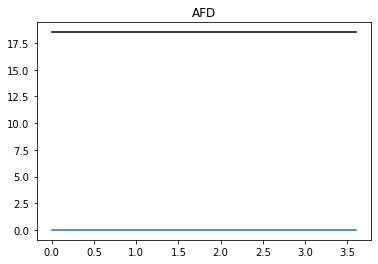

Axial Force Diagram for member 2:


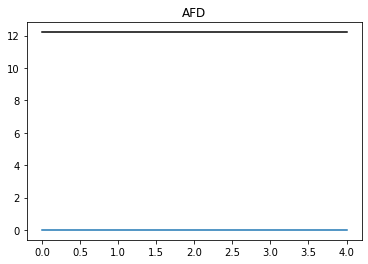

In [11]:
def PlaneFrameElementAxialDiagram(f, L):
    x1,x2,y1,y2=0,L,-f[0],f[3]
    plt.plot([x1,x2],[0,0])
    plt.plot([x1,x2],[y1,y2],'k')
    plt.title("AFD")
    plt.show()
print("Axial Force Diagram for member 1:")
PlaneFrameElementAxialDiagram(f1,L1)
print("Axial Force Diagram for member 2:")
PlaneFrameElementAxialDiagram(f2_c,L2)


SFD for Element : 1


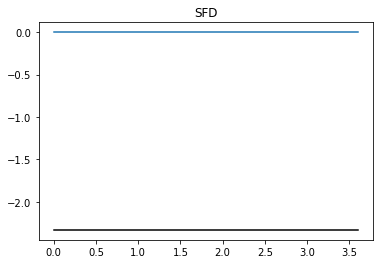

SFD for Element : 2


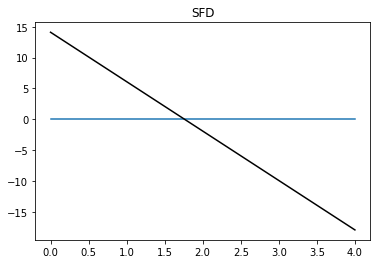

In [9]:
def PlaneFrameElementShearForceDiagram(f, L,m):
    x1,x2,y1,y2=0,L,f[1],-f[4]
    plt.plot([x1,x2],[0,0])
    plt.plot([x1,x2],[y1,y2],'k')
    plt.title("SFD")
    print(f"SFD for Element : {m}")
    plt.show()
PlaneFrameElementShearForceDiagram(f1,L1,1)
PlaneFrameElementShearForceDiagram(f2_c,L2,2)

BMD for Element : 1


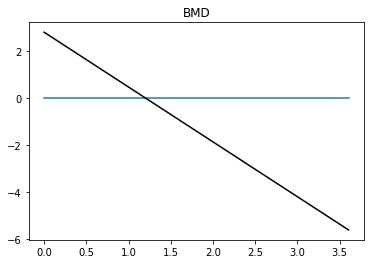

BMD for Element : 2


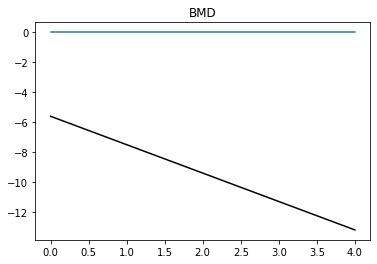

In [10]:
def PlaneFrameElementBendingMomentDiagram(f, L,m):
    x1,x2,y1,y2=0,L,-f[2],f[5]
    plt.plot([x1,x2],[0,0])
    plt.plot([x1,x2],[y1,y2],'k')
    plt.title("BMD")
    print(f"BMD for Element : {m}")
    plt.show()

PlaneFrameElementBendingMomentDiagram(f1, L1,1)
PlaneFrameElementBendingMomentDiagram(f2_c, L2,2)